In [2]:
import pandas as pd
import numpy as np

In [3]:
RAW_PATH = '../data/raw/train.csv'


In [4]:
data = pd.read_csv(RAW_PATH)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
# Drop ID since it will not be helpful in training
data = data.drop(columns=['Id'])

In [13]:
round(data.isnull().sum()/len(data), 2)

MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.18
LotArea          0.00
Street           0.00
                 ... 
MoSold           0.00
YrSold           0.00
SaleType         0.00
SaleCondition    0.00
SalePrice        0.00
Length: 80, dtype: float64

In [15]:
#Drop all columns which have more than 50 percent missing values
for col in data.columns:
    count_nan = data[col].isnull().sum()
    
    if count_nan >= len(data) / 2:
        data = data.drop(col, axis=1)
        print(f'Dropped column {col}')

data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [17]:
data.nunique()

MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 75, dtype: int64

In [56]:
data_copy = data.copy()
numerical_features = data_copy.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data_copy.select_dtypes(include=['object', 'category']).columns.tolist()

threshold = 25

discrete_numerical_features = [col for col in numerical_features if data_copy[col].nunique() <= threshold]
numerical_features = [col for col in numerical_features if data_copy[col].nunique() > threshold]


In [57]:
# Filter columns with low variance
low_variance_columns = [col for col in data_copy.columns if data_copy[col].nunique() < 2]
print("Low variance columns:", low_variance_columns)


Low variance columns: []


In [58]:
# Calculate correlation matrix
corr_matrix = data_copy[numerical_features].corr().abs()
# Find columns with high correlation (e.g., >0.9)
high_corr_pairs = [(col1, col2) for col1 in corr_matrix.columns for col2 in corr_matrix.columns if corr_matrix.loc[col1, col2] > 0.9 and col1 != col2]
print("Highly correlated column pairs:", high_corr_pairs)


Highly correlated column pairs: []


In [59]:
# Columns with more than 90% zeros
zero_dominant_columns = [col for col in data_copy.columns if (data_copy[col] == 0).mean() > 0.9]
print("Columns with mostly zeros:", zero_dominant_columns)
data_copy = data_copy.drop(columns=zero_dominant_columns)
print("Dropped zero dominant columns")

# Update the list of numerical features after dropping columns
numerical_features = [col for col in numerical_features if col in data_copy.columns]



Columns with mostly zeros: ['LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
Dropped zero dominant columns


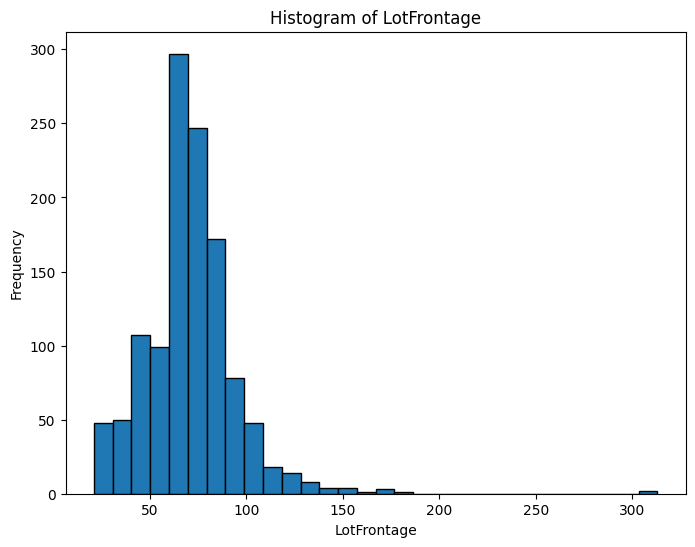

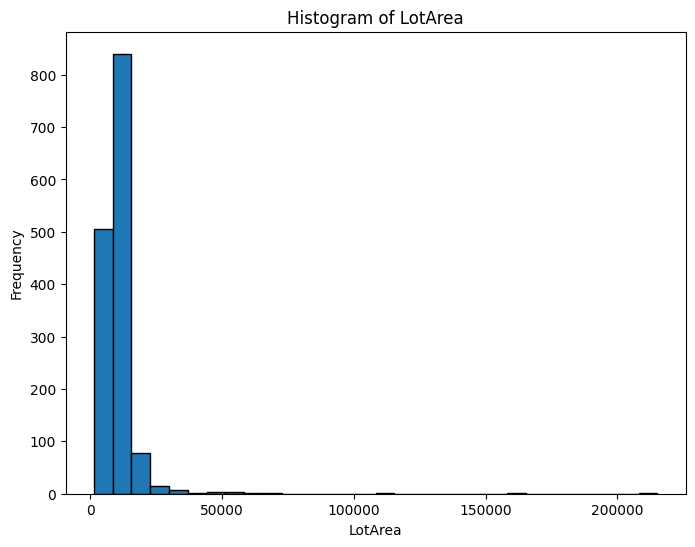

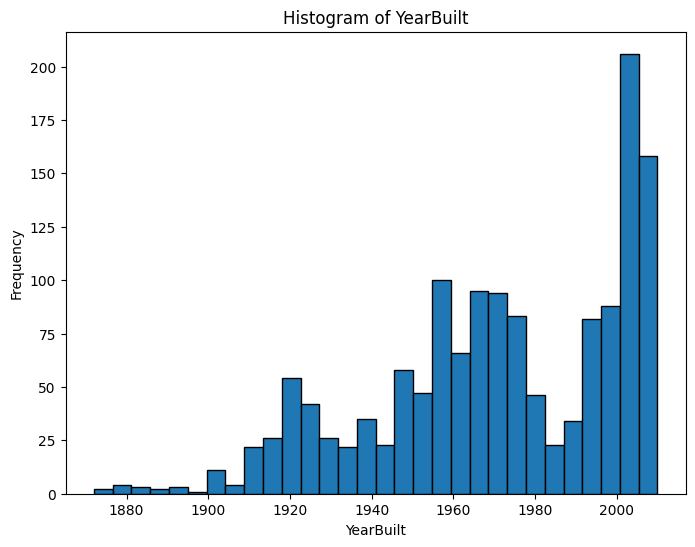

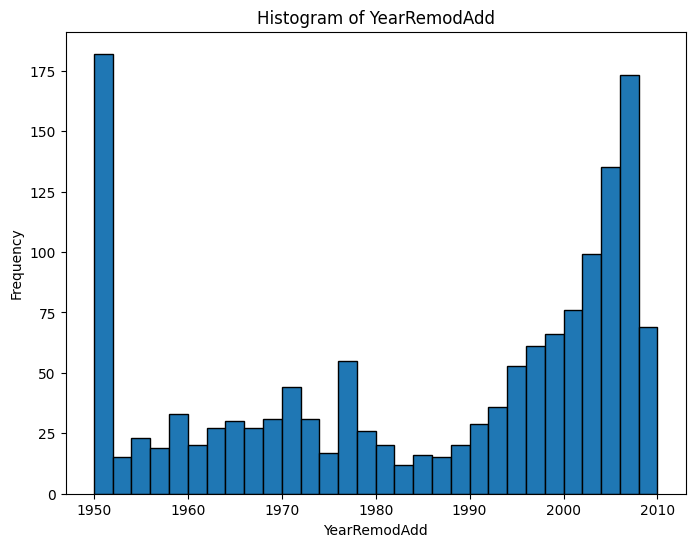

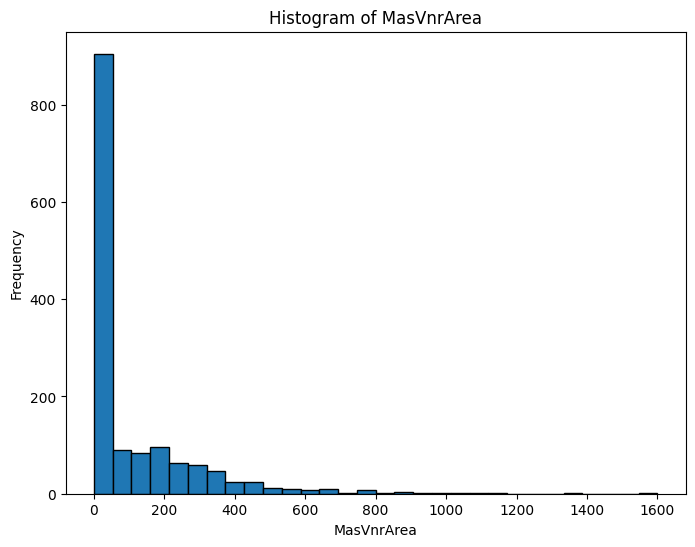

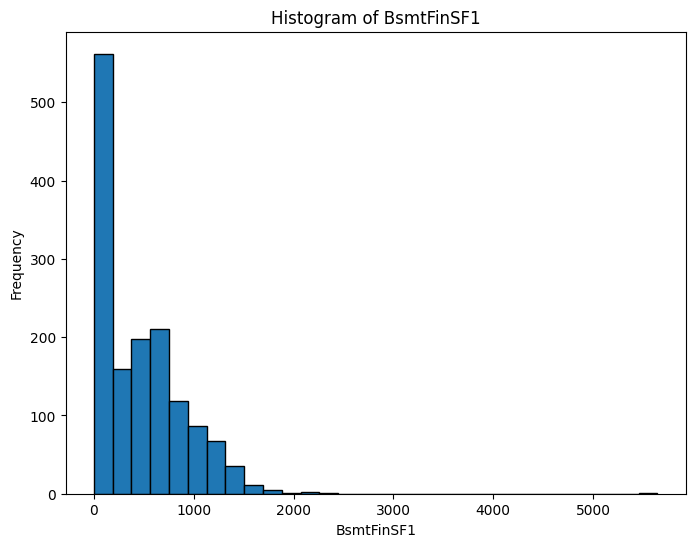

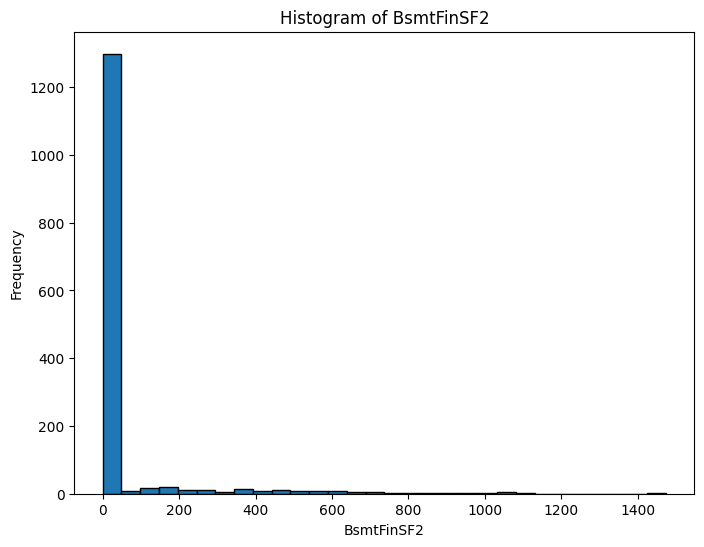

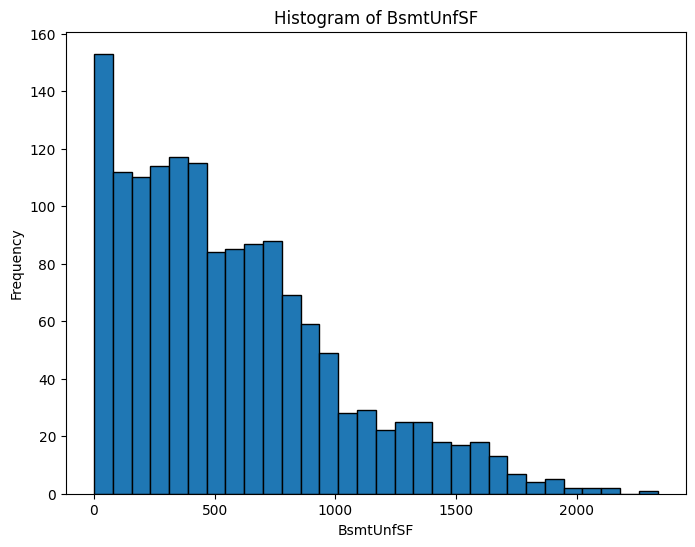

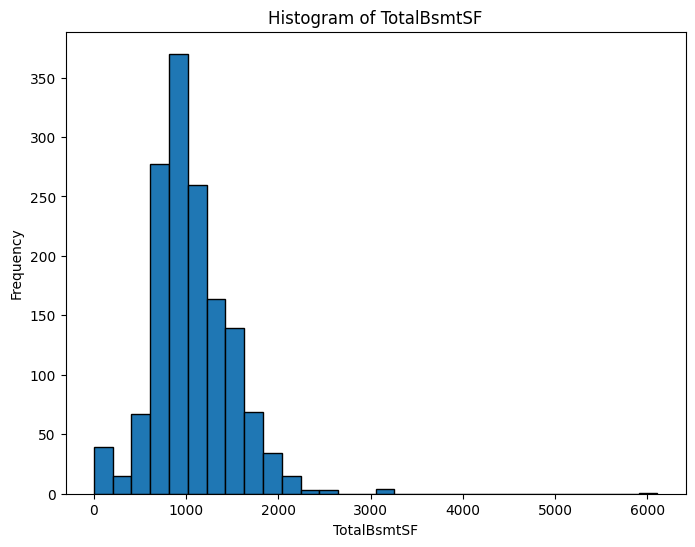

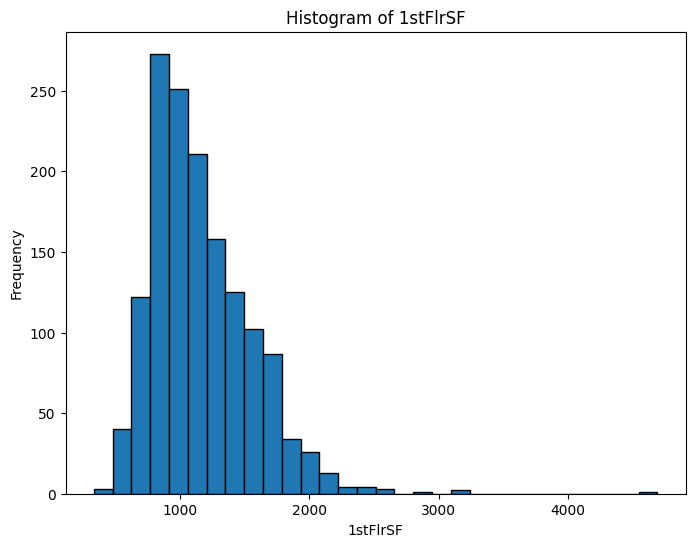

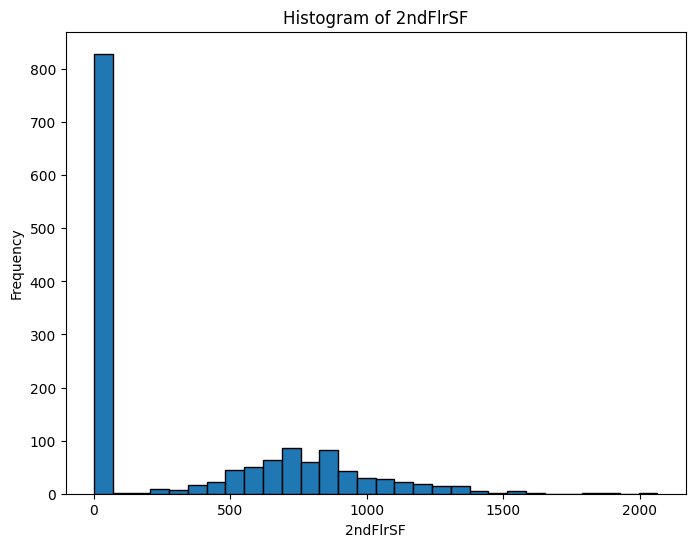

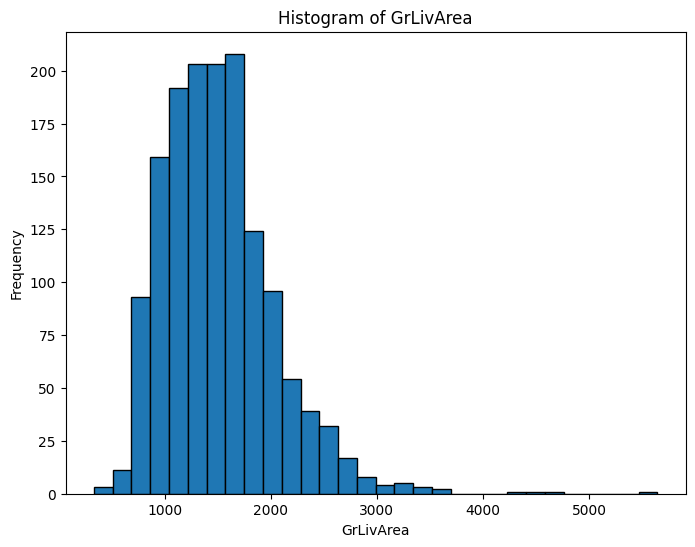

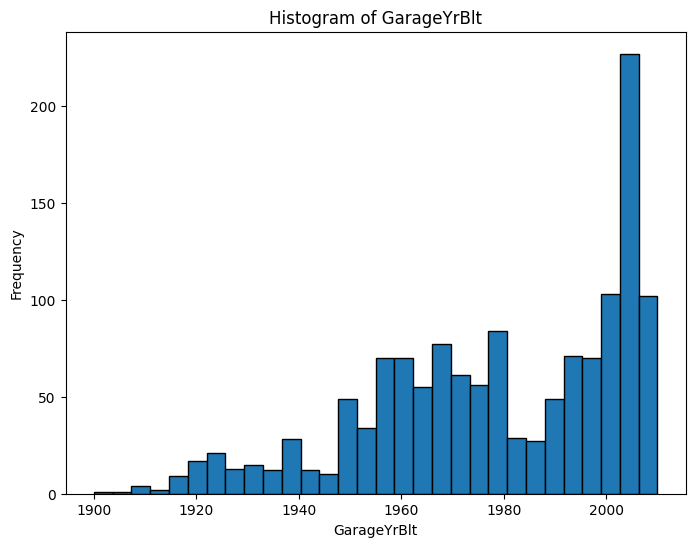

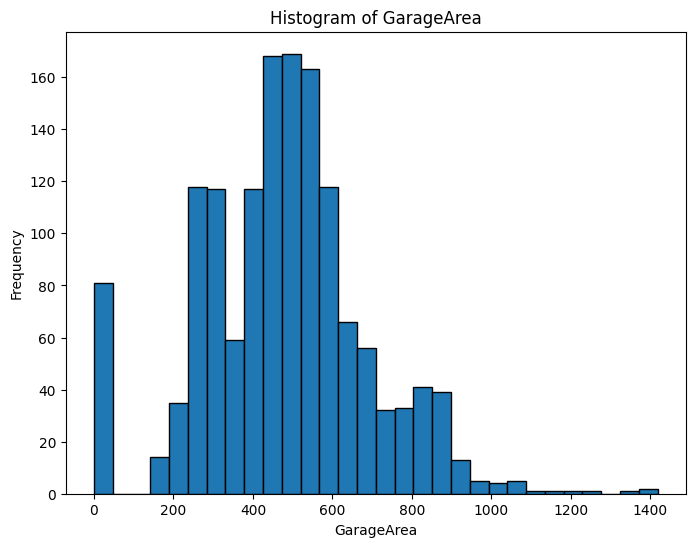

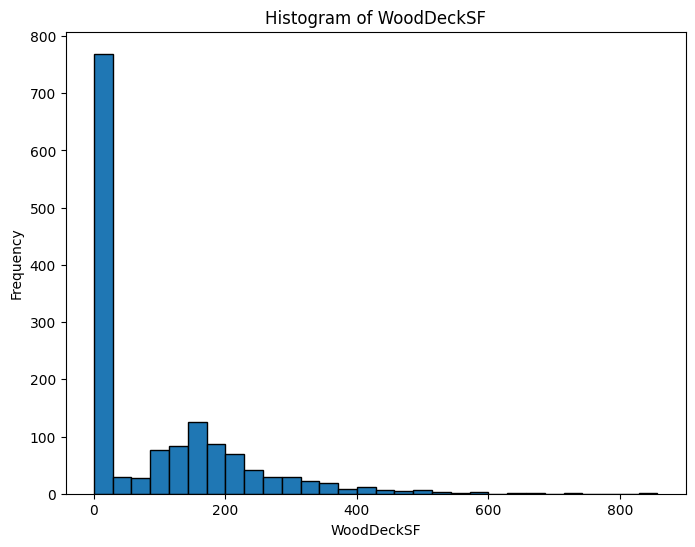

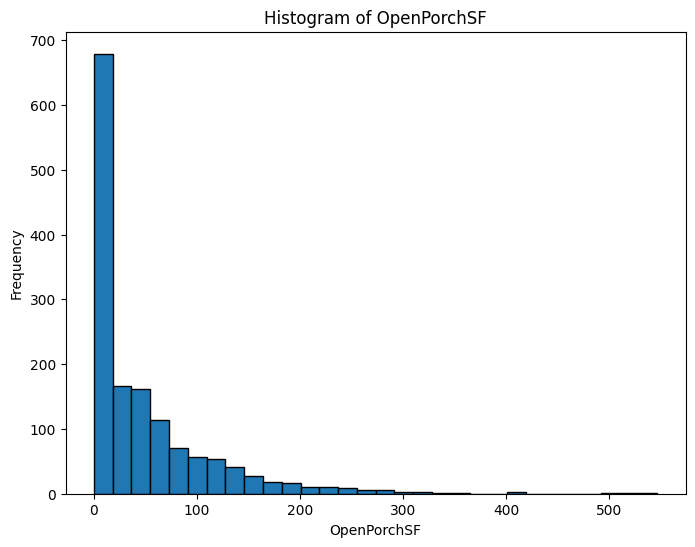

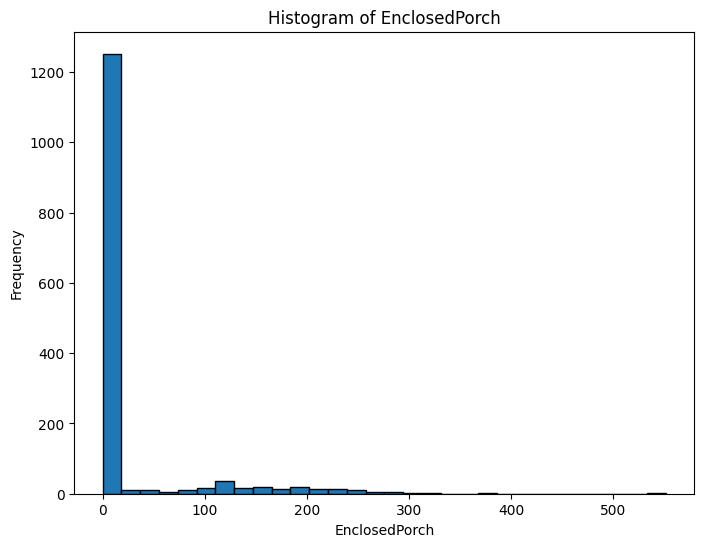

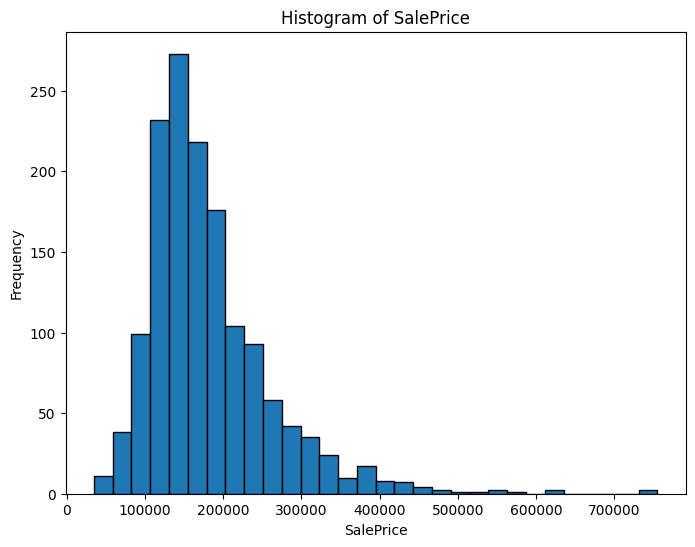

In [60]:
import matplotlib.pyplot as plt

for col in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(data_copy[col], bins=30, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#### Discrete Numerical features

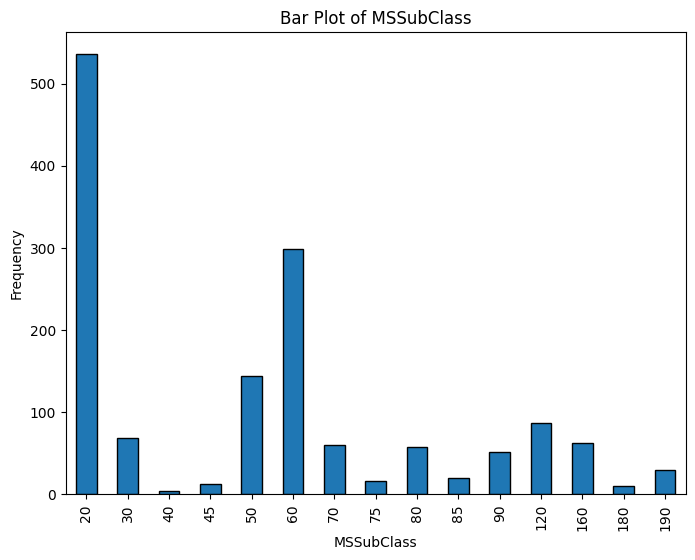

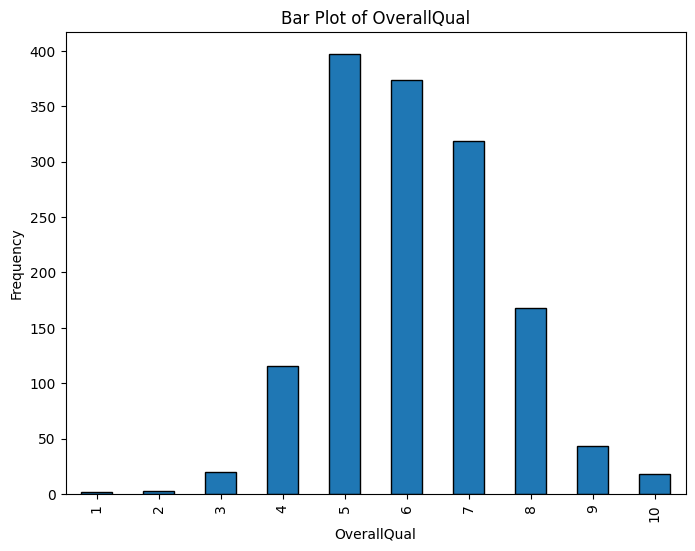

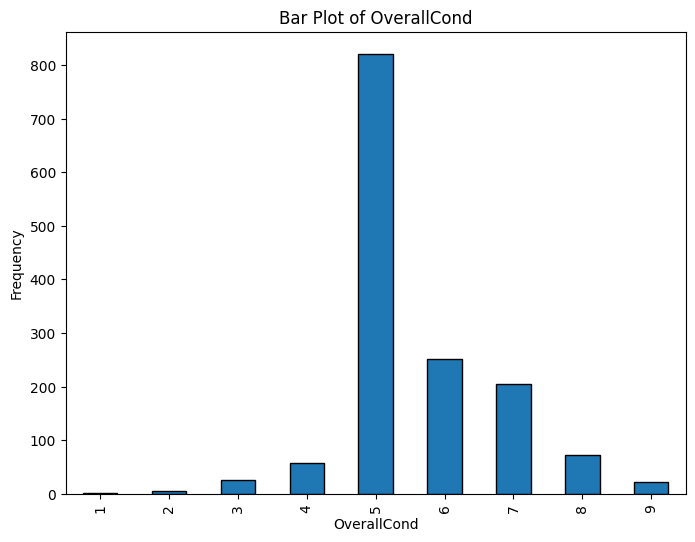

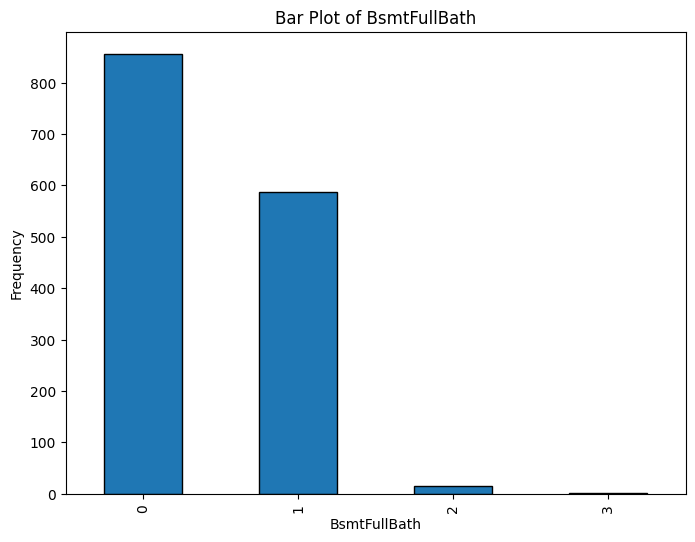

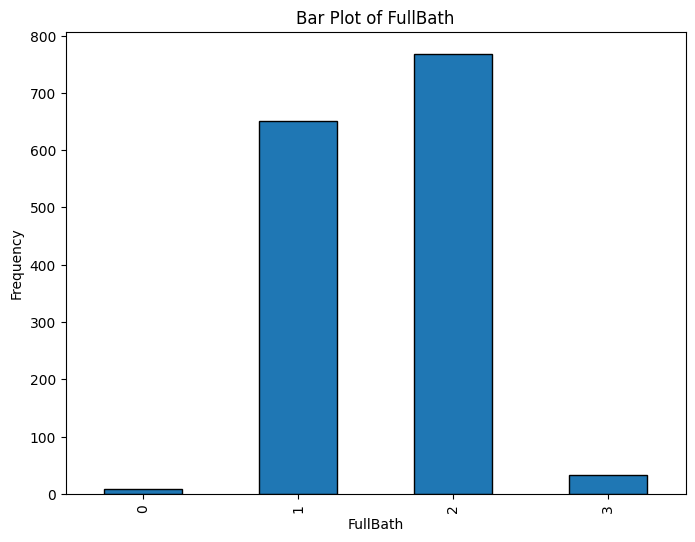

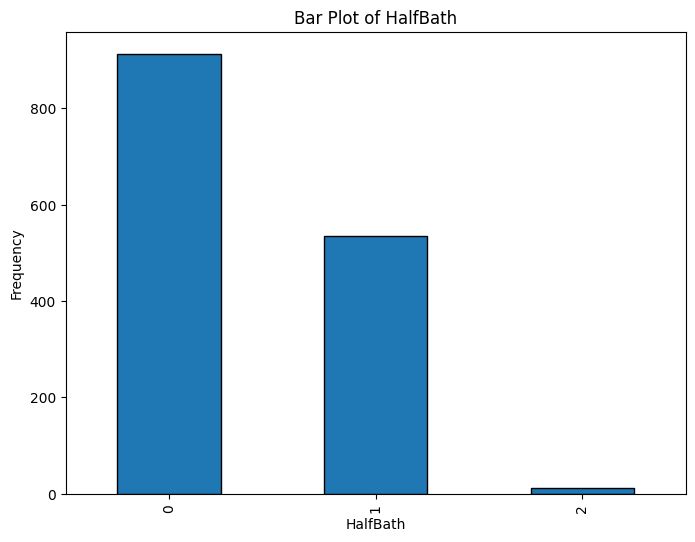

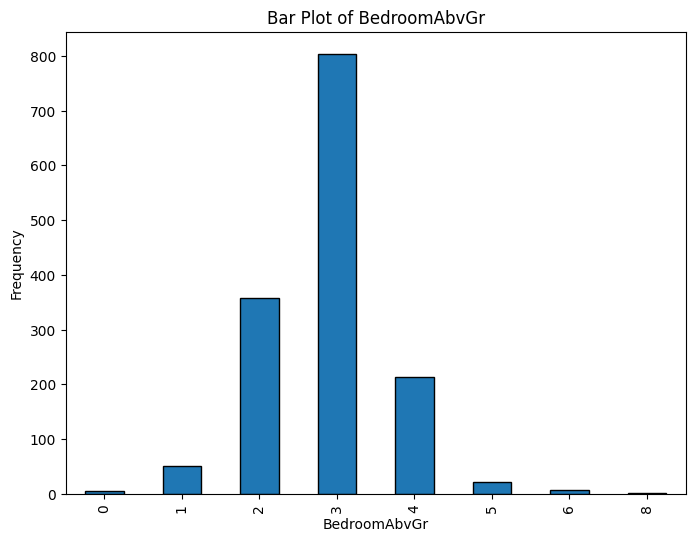

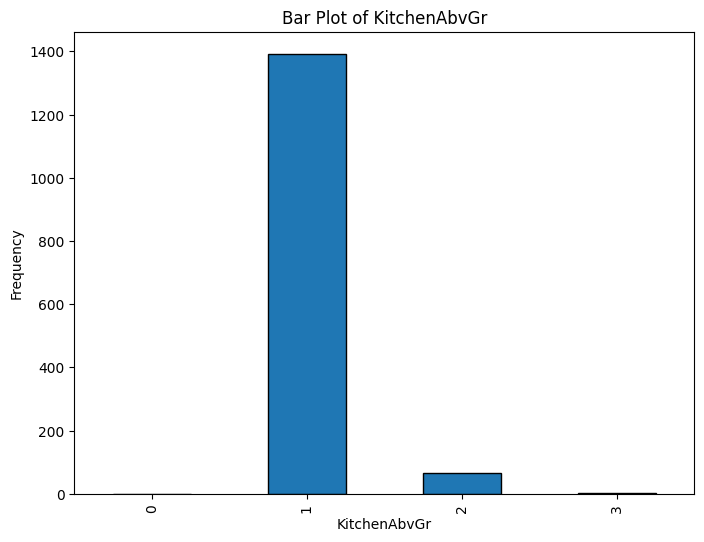

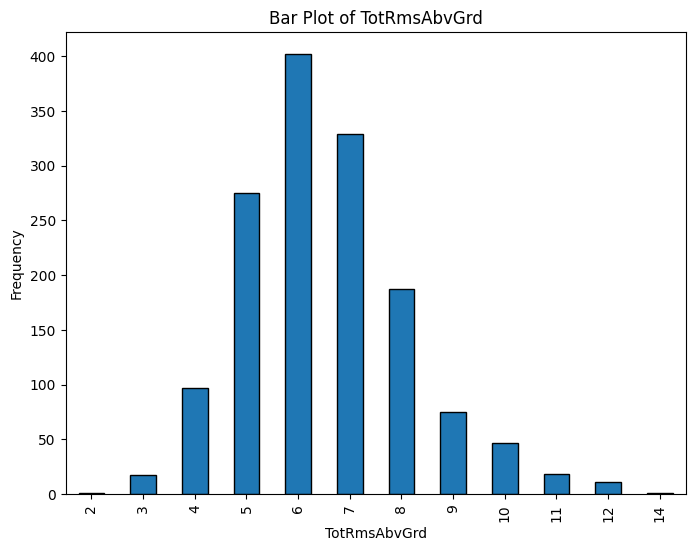

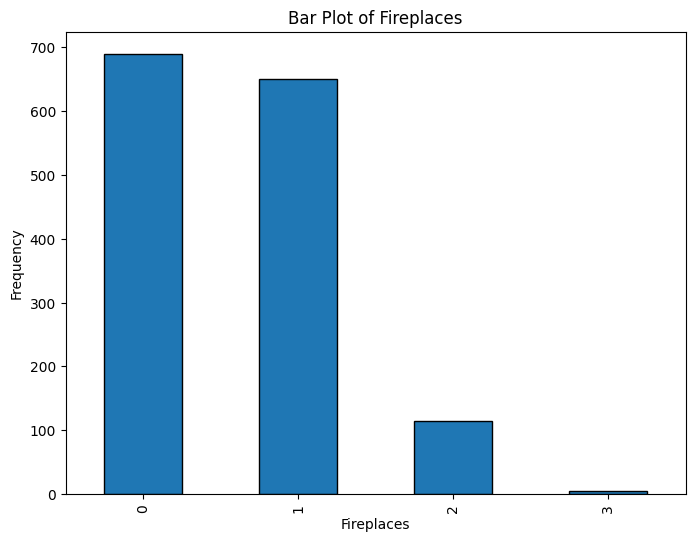

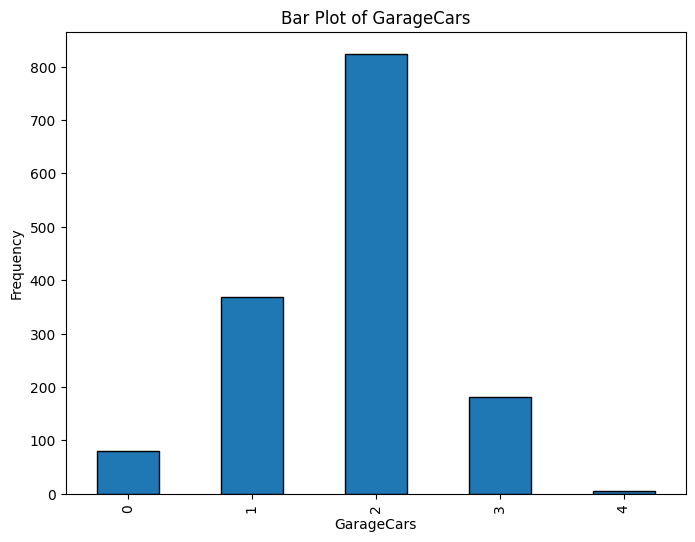

KeyError: 'PoolArea'

<Figure size 800x600 with 0 Axes>

In [71]:
# discrete_numerical_features.remove('LowQualFinSF')
# discrete_numerical_features.remove('BsmtHalfBath')
discrete_numerical_features.remove('3SsnPorch')
for col in discrete_numerical_features:
    plt.figure(figsize=(8, 6))
    data_copy[col].value_counts().sort_index().plot(kind='bar', edgecolor='black')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()